In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Math and Portuguese data
math_df = pd.read_csv("data/student-mat.csv", sep=';')
port_df = pd.read_csv("data/student-por.csv", sep=';')

In [3]:
# Combine the data
student_data_df = pd.concat([math_df,port_df])

In [4]:
# Rename columns
student_data_df.columns = ['school','sex','age','address','family_size_>_3','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','travel_time','study_time','failures','school_support',
          'family_support','paid_classes','extra_activities','nursery_school','wants_higher_edu','internet','romantic','family_relation',
          'free_time','go_out','weekday_alcohol','weekend_alcohol','health','absences','Q1_score','Q2_score','final_score']


In [5]:
# Create final grade and pass/fail columns for letter grades A:18-20 B:16-17 C:14-15 D:12-13 & F<12
student_data_df['final_letter_grade'] = 'None'
student_data_df.loc[(student_data_df.final_score >= 16) & (student_data_df.final_score <= 20), 'final_letter_grade'] = 'A' 
student_data_df.loc[(student_data_df.final_score >= 14) & (student_data_df.final_score <= 15), 'final_letter_grade'] = 'B'
student_data_df.loc[(student_data_df.final_score >= 12) & (student_data_df.final_score <= 13), 'final_letter_grade'] = 'C' 
student_data_df.loc[(student_data_df.final_score >= 10) & (student_data_df.final_score <= 11), 'final_letter_grade'] = 'D' 
student_data_df.loc[(student_data_df.final_score >= 0) & (student_data_df.final_score < 10), 'final_letter_grade'] = 'F' 

student_data_df['Pass_Fail'] = 'None'
student_data_df.loc[student_data_df.final_letter_grade != 'F', 'Pass_Fail'] = 'Pass'
student_data_df.loc[student_data_df.final_letter_grade == 'F', 'Pass_Fail'] = 'Fail'

In [6]:
#encode all columns
student_data_df['school'] = [1 if x == 'GP' else 0 for x in student_data_df['school']]
student_data_df['sex'] = [1 if x == 'M' else 0 for x in student_data_df['sex']]
student_data_df['family_size_>_3'] = [1 if x == 'GT3' else 0 for x in student_data_df['family_size_>_3']]
student_data_df['address'] = [1 if x == 'U' else 0 for x in student_data_df['address']]
student_data_df['parents_status'] = [1 if x == 'T' else 0 for x in student_data_df['parents_status']]
student_data_df['school_support'] = [1 if x == 'yes' else 0 for x in student_data_df['school_support']]
student_data_df['family_support'] = [1 if x == 'yes' else 0 for x in student_data_df['family_support']]
student_data_df['paid_classes'] = [1 if x == 'yes' else 0 for x in student_data_df['paid_classes']]
student_data_df['extra_activities'] = [1 if x == 'yes' else 0 for x in student_data_df['extra_activities']]
student_data_df['nursery_school'] = [1 if x == 'yes' else 0 for x in student_data_df['nursery_school']]
student_data_df['wants_higher_edu'] = [1 if x == 'yes' else 0 for x in student_data_df['wants_higher_edu']]
student_data_df['romantic'] = [1 if x == 'yes' else 0 for x in student_data_df['romantic']]
student_data_df['internet'] = [1 if x == 'yes' else 0 for x in student_data_df['internet']]
student_data_df['guardian'] = [1 if x == 'mother' else 0 for x in student_data_df['guardian']]

## Neural Network for Pass/Fail or Final Letter Grade ##

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
X = student_data_df.drop(['Q1_score', 'Q2_score', 'final_score', 'final_letter_grade', 'Pass_Fail'], axis=1)
X = pd.get_dummies(X, columns=['mother_job','father_job','reason'])
#y = student_data_df['final_letter_grade']
y = student_data_df['Pass_Fail']
X.shape, y.shape

label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y)

In [10]:
X_scaler = StandardScaler().fit(X_train)

In [11]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [13]:
model = Sequential()
model.add(Dense(units=41, activation='relu', input_dim=41))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=25,
    shuffle=True,
    verbose=2,
    batch_size=1
)

Epoch 1/25
783/783 - 1s - loss: 0.5328 - accuracy: 0.7931
Epoch 2/25
783/783 - 1s - loss: 0.4370 - accuracy: 0.8123
Epoch 3/25
783/783 - 1s - loss: 0.3950 - accuracy: 0.8289
Epoch 4/25
783/783 - 1s - loss: 0.3570 - accuracy: 0.8467
Epoch 5/25
783/783 - 1s - loss: 0.3183 - accuracy: 0.8570
Epoch 6/25
783/783 - 1s - loss: 0.2856 - accuracy: 0.8723
Epoch 7/25
783/783 - 1s - loss: 0.2703 - accuracy: 0.8876
Epoch 8/25
783/783 - 1s - loss: 0.2385 - accuracy: 0.8978
Epoch 9/25
783/783 - 1s - loss: 0.2019 - accuracy: 0.9195
Epoch 10/25
783/783 - 1s - loss: 0.1872 - accuracy: 0.9208
Epoch 11/25
783/783 - 1s - loss: 0.1642 - accuracy: 0.9323
Epoch 12/25
783/783 - 1s - loss: 0.1528 - accuracy: 0.9361
Epoch 13/25
783/783 - 1s - loss: 0.1352 - accuracy: 0.9476
Epoch 14/25
783/783 - 1s - loss: 0.1260 - accuracy: 0.9553
Epoch 15/25
783/783 - 1s - loss: 0.1101 - accuracy: 0.9604
Epoch 16/25
783/783 - 1s - loss: 0.1048 - accuracy: 0.9668
Epoch 17/25
783/783 - 1s - loss: 0.0925 - accuracy: 0.9617
Epoch 

In [15]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2, batch_size=1)

261/261 - 0s - loss: 1.1364 - accuracy: 0.6935


## RFN for Final Letter Grade ##

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)

X = student_data_df.drop(['Q1_score', 'Q2_score', 'final_score', 'final_letter_grade', 'Pass_Fail'], axis=1)
X = pd.get_dummies(X, columns=['mother_job','father_job','reason'])
y = student_data_df['final_letter_grade']

label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=0)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
rf.fit(X_train_scaled, y_train_categorical)
sorted(zip(rf.feature_importances_, X_train.columns), reverse=True)

[(0.11136731806122678, 'absences'),
 (0.04535803911653775, 'age'),
 (0.04398797879050486, 'health'),
 (0.04366103987784114, 'go_out'),
 (0.04237539531771746, 'weekend_alcohol'),
 (0.04185932421078391, 'paid_classes'),
 (0.04155027455935364, 'free_time'),
 (0.04143439151797037, 'father_education'),
 (0.04137664337704923, 'failures'),
 (0.039529356829083824, 'mother_education'),
 (0.035945780444507844, 'family_relation'),
 (0.03543719674591009, 'study_time'),
 (0.0264232360422707, 'travel_time'),
 (0.02330856701035836, 'weekday_alcohol'),
 (0.01992830429476781, 'extra_activities'),
 (0.01975181748448346, 'romantic'),
 (0.01963265744385782, 'family_size_>_3'),
 (0.019618731149951538, 'family_support'),
 (0.019478425987999728, 'sex'),
 (0.01839526208725529, 'reason_course'),
 (0.01780438982429667, 'father_job_other'),
 (0.017519228366084383, 'mother_job_other'),
 (0.017431700284985283, 'guardian'),
 (0.016104718699134535, 'school'),
 (0.015836847270481746, 'reason_reputation'),
 (0.0155683

In [18]:
rf.score(X_train_scaled, y_train_categorical)

0.9731800766283525

In [19]:
rf.score(X_test_scaled, y_test_categorical)

0.16475095785440613

## RFN for Pass/Fail ##

In [20]:
from sklearn.ensemble import RandomForestClassifier

X = student_data_df.drop(['Q1_score', 'Q2_score', 'final_score', 'final_letter_grade', 'Pass_Fail'], axis=1)
X = pd.get_dummies(X, columns=['mother_job','father_job','reason'])
y = student_data_df['Pass_Fail']

label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=0)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [21]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train_scaled, y_train_categorical)
sorted(zip(rf.feature_importances_, X_train.columns), reverse=True)

[(0.11747013622480948, 'absences'),
 (0.10579236939286533, 'failures'),
 (0.042476998554522194, 'age'),
 (0.04142439874052478, 'go_out'),
 (0.03940410454311976, 'free_time'),
 (0.038489223754817295, 'weekend_alcohol'),
 (0.0356254687658135, 'family_relation'),
 (0.03514892492075193, 'health'),
 (0.03481270793686856, 'mother_education'),
 (0.03426807031724901, 'paid_classes'),
 (0.0313997140515763, 'father_education'),
 (0.030776674582565965, 'study_time'),
 (0.026161452026830026, 'travel_time'),
 (0.022728096530621848, 'weekday_alcohol'),
 (0.02055544904720052, 'school'),
 (0.020262067112090793, 'wants_higher_edu'),
 (0.020221960249328076, 'romantic'),
 (0.017664786268189306, 'address'),
 (0.01713266241998275, 'sex'),
 (0.016846372509184224, 'extra_activities'),
 (0.016044142750599514, 'family_size_>_3'),
 (0.01598874014982391, 'guardian'),
 (0.015983586986138297, 'internet'),
 (0.01585579049062983, 'reason_course'),
 (0.015817896732756444, 'mother_job_other'),
 (0.01569738239346182, '

In [22]:
rf.score(X_train_scaled, y_train_categorical)

0.9936143039591315

In [23]:
rf.score(X_test_scaled, y_test_categorical)

0.8122605363984674

## Linear Regression for Final Score ##

In [24]:
from sklearn.linear_model import LinearRegression, LogisticRegression
model = LinearRegression()

X = student_data_df.drop(['Q1_score', 'Q2_score', 'final_score', 'final_letter_grade', 'Pass_Fail'], axis=1)
X = pd.get_dummies(X, columns=['mother_job','father_job','reason'])
y = student_data_df['final_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
model.fit(X_train_scaled, y_train)

LinearRegression()

Training: 0.2271114933266679 
 Testing: 0.2889762968349635


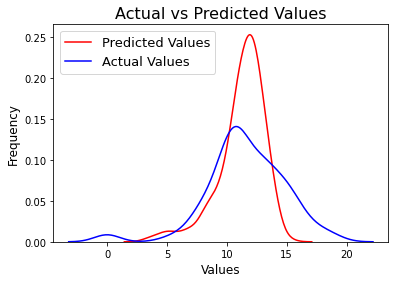

In [26]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

print(f"Training: {training_score} \n Testing: {testing_score}")

y_pred = model.predict(X_test_scaled)


import seaborn as sb

sb.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

## Basic Logistic Regression for Pass/Fail ##

In [27]:
model = LogisticRegression(solver='liblinear')

X = student_data_df.drop(['Q1_score', 'Q2_score', 'final_score', 'final_letter_grade', 'Pass_Fail'], axis=1)
X = pd.get_dummies(X, columns=['mother_job','father_job','reason'])
y = student_data_df['Pass_Fail']
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [28]:
model.fit(X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [29]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)
print(f"Training: {training_score} \n Testing: {testing_score}")

Training: 0.80970625798212 
 Testing: 0.7931034482758621


 ## Optimized Logistic Regression ##

In [216]:
from imblearn.over_sampling import SMOTE

state = 1333822816

X = student_data_df.drop(['Q1_score','Q2_score', 'final_score', 'final_letter_grade', 'Pass_Fail'], axis=1)
X = pd.get_dummies(X, columns=['mother_job','father_job','reason'])
y = student_data_df['Pass_Fail']
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

os = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.3, random_state=state)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

cols = []

for i in range(len(columns)):
    if rfe.support_[i]:
        cols.append(columns[i])

X = os_data_X[cols]
y = os_data_y['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=state)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

from sklearn.metrics import f1_score as f1

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('F1 of logistic regression classifier on test set: {:.2f}'.format(f1(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.91
F1 of logistic regression classifier on test set: 0.92
1333822816


In [217]:
import pickle
Pkl_Filename = "Test_Score_LR_v2.pkl"  

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(logreg, file)


neural network and RFN were between 72 and 81

 by using Smote and RFE, we were able to shift the range of accuracy values from 76-84 to 82-90 with no test scores
 and 86-94 with the Q1 Score (and not Q2), and 91-96 with the Q2 score (and not Q1)